In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
# Read Hpv data
file_address = '../Data/NassauCountyHPV.csv'

df_hpv_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyHPV.csv'

df_hpv_suffolk = pd.read_csv(file_address)

In [4]:
# Read TDAP data
file_address = '../Data/NassauCountyTDAP.csv'

df_tdap_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyTDAP.csv'

df_tdap_suffolk = pd.read_csv(file_address)

In [5]:
file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [6]:
df_hpv_nassau

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M
2,12409,8,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil 9,11590.0,Nassau,Nassau,M
3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M
4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F
...,...,...,...,...,...,...,...,...,...,...,...
415193,23574745,8,2018,UNKNOWN,UNKNOWN,13,Gardasil 9,11510.0,Nassau,Nassau,F
415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F
415195,23577049,6,2020,WHITE,NOT HISPANIC OR LATINO,12,Gardasil 9,11791.0,Nassau,Nassau,F
415196,23577071,6,2019,ASIAN,NOT HISPANIC OR LATINO,12,Gardasil 9,11753.0,Nassau,New York,M


In [86]:
df_tdap_nassau

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
29,532375,11,2010,WHITE,NOT HISPANIC OR LATINO,10,Unspecified,11001.0,Nassau,Nassau,F
30,591190,2,2010,WHITE,NOT HISPANIC OR LATINO,20,Unspecified,11001.0,Nassau,Seneca,F
31,805052,4,2015,OTHER,HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,M
32,806808,8,2013,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,F
33,806823,9,2018,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Adacel,11001.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
417962,4087448,9,2011,UNKNOWN,UNKNOWN,7,DAPTACEL,11950.0,Nassau,Nassau,F
417963,11746886,12,2015,OTHER,HISPANIC OR LATINO,41,Unspecified,11950.0,Nassau,Suffolk,M
417964,15759761,4,2019,UNKNOWN,NOT HISPANIC OR LATINO,60,Unspecified,11951.0,Nassau,Suffolk,F
417965,19433895,9,2021,WHITE,NOT HISPANIC OR LATINO,58,Unspecified,11956.0,Nassau,Suffolk,M


In [7]:
print(len(df_hpv_nassau))
print(len(df_hpv_suffolk))
print(len(df_tdap_nassau))
print(len(df_tdap_suffolk))

415198
449593
420314
471029


In [8]:
# Data Samples Without zipcode
print('Nassau N/A zipcode samples in HPV:', df_hpv_nassau['PatientZip'].isnull().sum())
print('Suffolk N/A zipcode samples in HPV:', df_hpv_suffolk['PatientZip'].isnull().sum())
print('Nassau N/A zipcode samples in TDAP:', df_tdap_nassau['PatientZip'].isnull().sum())
print('Suffokl N/A zipcode samples in TDAP:', df_tdap_suffolk['PatientZip'].isnull().sum())

Nassau N/A zipcode samples in HPV: 3001
Suffolk N/A zipcode samples in HPV: 4829
Nassau N/A zipcode samples in TDAP: 2308
Suffokl N/A zipcode samples in TDAP: 3433


In [9]:
# Data Samples with zipcode not On the Long Island(Suffolk and Nassau)
zips = np.array(df_zipcode['zip'])

condition = (~df_hpv_nassau['PatientZip'].isin(zips))
print(len(df_hpv_nassau[condition]))
condition = (~df_hpv_suffolk['PatientZip'].isin(zips))
print(len(df_hpv_suffolk[condition]))
condition = (~df_tdap_nassau['PatientZip'].isin(zips))
print(len(df_tdap_nassau[condition]))
condition = (~df_tdap_suffolk['PatientZip'].isin(zips))
print(len(df_tdap_suffolk[condition]))

3321
5024
2580
3628


In [46]:
len(zips)

220

In [10]:
# Clean Data , drop N/A zipcode
df_hpv_nassau.dropna(subset=['PatientZip'], inplace=True)
df_hpv_suffolk.dropna(subset=['PatientZip'], inplace=True)
df_tdap_nassau.dropna(subset=['PatientZip'], inplace=True)
df_tdap_suffolk.dropna(subset=['PatientZip'], inplace=True)

In [11]:
print(len(df_hpv_nassau))
print(len(df_hpv_suffolk))
print(len(df_tdap_nassau))
print(len(df_tdap_suffolk))

412197
444764
418006
467596


In [12]:
# Clean Data, drop zipcode not on the Long Island
df_hpv_nassau = df_hpv_nassau[df_hpv_nassau['PatientZip'].isin(zips)]
df_hpv_suffolk = df_hpv_suffolk[df_hpv_suffolk['PatientZip'].isin(zips)]
df_tdap_nassau = df_tdap_nassau[df_tdap_nassau['PatientZip'].isin(zips)]
df_tdap_suffolk = df_tdap_suffolk[df_tdap_suffolk['PatientZip'].isin(zips)]

In [13]:
print(len(df_hpv_nassau))
print(len(df_hpv_suffolk))
print(len(df_tdap_nassau))
print(len(df_tdap_suffolk))

411877
444569
417734
467401


In [14]:
df_tdap_suffolk['vax_year'].unique()

array([2008, 2016, 2021, 2010, 2019, 2013, 2009, 2017, 2011, 2018, 2012,
       2015, 2020, 2014])

### Generate 2015 vaccine rate

In [15]:
df_zipcode

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
0,501,UNIQUE,0,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,6390,PO BOX,0,Fishers Island,Fishers Isle,NaN,NY,Suffolk County,America/New_York,631,NaN,US,41.27,-71.99,286
3,11001,STANDARD,0,Floral Park,"Bellerose Vil, Bellerose Village, S Floral Par...","Bellerose Terrace, Bellrose Village, So Floral...",NY,Nassau County,America/New_York,"516,718",NaN,US,40.72,-73.70,26970
4,11003,STANDARD,0,Elmont,"Alden Manor, Floral Park, Meacham","Argo Village, Locustwood",NY,Nassau County,America/New_York,516,NaN,US,40.70,-73.70,44160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,11975,PO BOX,0,Wainscott,NaN,NaN,NY,Suffolk County,America/New_York,631,NaN,US,40.94,-72.24,1196
216,11976,STANDARD,0,Water Mill,NaN,"Watermill, Wtr Mill",NY,Suffolk County,America/New_York,631,NaN,US,40.92,-72.34,2070
217,11977,STANDARD,0,Westhampton,NaN,"W Hampton, West Hampton",NY,Suffolk County,America/New_York,631,NaN,US,40.83,-72.68,2380
218,11978,STANDARD,0,Westhampton Beach,W Hampton Bch,"Quioque, W Hampton Beach, West Hampton Beach, ...",NY,Suffolk County,America/New_York,631,NaN,US,40.83,-72.65,3420


In [19]:
df_zipcode['county'].unique()

array(['Suffolk County', 'Nassau County'], dtype=object)

In [15]:
populations = np.array(df_zipcode['irs_estimated_population_2015'])

In [16]:
zips

array([  501,   544,  6390, 11001, 11003, 11010, 11020, 11021, 11022,
       11023, 11024, 11025, 11026, 11027, 11030, 11040, 11041, 11042,
       11043, 11044, 11050, 11051, 11052, 11053, 11054, 11055, 11096,
       11099, 11501, 11507, 11509, 11510, 11514, 11516, 11518, 11520,
       11530, 11531, 11535, 11536, 11542, 11545, 11547, 11548, 11549,
       11550, 11551, 11552, 11553, 11554, 11555, 11556, 11557, 11558,
       11559, 11560, 11561, 11563, 11565, 11566, 11568, 11569, 11570,
       11571, 11572, 11575, 11576, 11577, 11579, 11580, 11581, 11582,
       11590, 11592, 11594, 11595, 11596, 11597, 11598, 11599, 11701,
       11702, 11703, 11704, 11705, 11706, 11707, 11708, 11709, 11710,
       11713, 11714, 11715, 11716, 11717, 11718, 11719, 11720, 11721,
       11722, 11724, 11725, 11726, 11727, 11729, 11730, 11731, 11732,
       11733, 11735, 11736, 11737, 11738, 11739, 11740, 11741, 11742,
       11743, 11746, 11747, 11749, 11750, 11751, 11752, 11753, 11754,
       11755, 11756,

In [47]:
result = df_hpv_nassau

In [46]:
len(df_hpv_nassau)

411877

In [49]:
result

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M
2,12409,8,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil 9,11590.0,Nassau,Nassau,M
3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M
4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F
...,...,...,...,...,...,...,...,...,...,...,...
415193,23574745,8,2018,UNKNOWN,UNKNOWN,13,Gardasil 9,11510.0,Nassau,Nassau,F
415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F
415195,23577049,6,2020,WHITE,NOT HISPANIC OR LATINO,12,Gardasil 9,11791.0,Nassau,Nassau,F
415196,23577071,6,2019,ASIAN,NOT HISPANIC OR LATINO,12,Gardasil 9,11753.0,Nassau,New York,M


In [50]:
result2015 = result[result['vax_year']==2015]

In [53]:
result2015 = result2015.drop_duplicates(subset=['client_id'])

In [57]:
result2015['PatientZip'] = result2015['PatientZip'].astype(int)


In [59]:
zipcode_count = result2015['PatientZip'].value_counts().reset_index()
zipcode_count.columns = ['PatientZip', 'NumClients']

In [60]:
zipcode_count

,PatientZip,NumClients
0,11550,2400
1,11520,1447
2,11590,1404
3,11580,1230
4,11003,1221
...,...,...
100,11025,1
101,11052,1
102,11571,1
103,11763,1


In [ ]:
result_s = df_hpv_suffolk

In [63]:
df_t = pd.concat([df_hpv_suffolk,df_hpv_nassau])

In [65]:
len(df_t)

856446

In [67]:
df_t2015=df_t[df_t['vax_year']<=2015]
len(df_t2015)

378961

In [69]:
df_t2015_distinct = df_t2015.drop_duplicates(subset=['client_id'])
len(df_t2015_distinct)

183752

In [70]:
zipcode_count = df_t2015_distinct['PatientZip'].value_counts().reset_index()
zipcode_count.columns = ['PatientZip', 'NumClients']

In [71]:
zipcode_count

,PatientZip,NumClients
0,11717.0,6129
1,11550.0,5814
2,11706.0,4713
3,11746.0,4690
4,11003.0,3678
...,...,...
202,11531.0,1
203,11774.0,1
204,501.0,1
205,11051.0,1


In [72]:
zips

array([  501,   544,  6390, 11001, 11003, 11010, 11020, 11021, 11022,
       11023, 11024, 11025, 11026, 11027, 11030, 11040, 11041, 11042,
       11043, 11044, 11050, 11051, 11052, 11053, 11054, 11055, 11096,
       11099, 11501, 11507, 11509, 11510, 11514, 11516, 11518, 11520,
       11530, 11531, 11535, 11536, 11542, 11545, 11547, 11548, 11549,
       11550, 11551, 11552, 11553, 11554, 11555, 11556, 11557, 11558,
       11559, 11560, 11561, 11563, 11565, 11566, 11568, 11569, 11570,
       11571, 11572, 11575, 11576, 11577, 11579, 11580, 11581, 11582,
       11590, 11592, 11594, 11595, 11596, 11597, 11598, 11599, 11701,
       11702, 11703, 11704, 11705, 11706, 11707, 11708, 11709, 11710,
       11713, 11714, 11715, 11716, 11717, 11718, 11719, 11720, 11721,
       11722, 11724, 11725, 11726, 11727, 11729, 11730, 11731, 11732,
       11733, 11735, 11736, 11737, 11738, 11739, 11740, 11741, 11742,
       11743, 11746, 11747, 11749, 11750, 11751, 11752, 11753, 11754,
       11755, 11756,

In [73]:
populations

array([  562,     0,   286, 26970, 44160, 23400,  6230, 17310,   603,
        8930,  6710,     0,     0,     0, 18210, 42610,     0,   380,
           0,     0, 29680,     0,     0,     0,     0,     0,  7670,
           0, 19150,  7610,  2290, 32870,  4590,  7990, 10240, 42530,
       28860,   176,     0,     0, 23880, 11620,  1045,  1270,    32,
       52300,  1239, 24880, 25970, 37020,     0,    14,  8080,  7560,
        8450,  6320, 31560, 21470,  8900, 35900,  3240,  1554, 27160,
         266, 30290, 16430, 12540, 12260,  4910, 41510, 21490,   483,
       46820,     0,     0,     0, 10700,     0, 14000,     0, 25360,
       13780, 16530, 37590,  7800, 61130,   134,     0,  6420, 34190,
       10260, 22770,  4440, 10000, 62310,  3360,  2850, 27560,  6310,
       35510,  3400, 28920, 19870, 26240, 27300, 13780, 29720,  3420,
       17080, 31420,    20,     0, 16060,  1506,  9040, 26800, 12710,
       40850, 64640, 20620,  3210,     0, 13860,  9640, 13670, 18020,
       11530, 42530,

In [74]:
zip_popu_dict = {}
for i in range(0,len(zips)):
    zip_popu_dict[zips[i]] = populations[i]

In [78]:
zipcode_count['PatientZip'][1]

11550.0

In [84]:
zip_rate_dict = {}
zip_rate = []
for i in range(0,len(zipcode_count)):
    if zipcode_count['NumClients'][i] > zip_popu_dict[zipcode_count['PatientZip'][i]]:
        print('incorrect answer',int(zipcode_count['PatientZip'][i]),'with' ,zipcode_count['NumClients'][i],'patients with populations of ',zip_popu_dict[zipcode_count['PatientZip'][i]])
        continue
    zip_rate_dict[zipcode_count['PatientZip'][i]] = zipcode_count['NumClients'][i]/zip_popu_dict[zipcode_count['PatientZip'][i]]

incorrect answer 11549 with 40 patients with populations of  32
incorrect answer 11773 with 7 patients with populations of  0
incorrect answer 11027 with 7 patients with populations of  0
incorrect answer 11708 with 4 patients with populations of  0
incorrect answer 11750 with 4 patients with populations of  0
incorrect answer 11026 with 4 patients with populations of  0
incorrect answer 11760 with 3 patients with populations of  0
incorrect answer 11535 with 3 patients with populations of  0
incorrect answer 11043 with 2 patients with populations of  0
incorrect answer 11044 with 2 patients with populations of  0
incorrect answer 11052 with 2 patients with populations of  0
incorrect answer 11737 with 2 patients with populations of  0
incorrect answer 11775 with 2 patients with populations of  0
incorrect answer 11595 with 1 patients with populations of  0
incorrect answer 11025 with 1 patients with populations of  0
incorrect answer 11599 with 1 patients with populations of  0
incorr

In [85]:
zip_rate_dict

{11717.0: 0.09836302359171882,
 11550.0: 0.11116634799235181,
 11706.0: 0.07709798789465075,
 11746.0: 0.07255569306930693,
 11003.0: 0.08328804347826087,
 11520.0: 0.08561015753585705,
 11590.0: 0.07644169158479282,
 11580.0: 0.08614791616477957,
 11722.0: 0.09659250915235144,
 11040.0: 0.06320112649612766,
 11553.0: 0.10369657296881017,
 11743.0: 0.0627172582619339,
 11758.0: 0.04775112443778111,
 11772.0: 0.06282019398159662,
 11787.0: 0.07463443748134885,
 11801.0: 0.06055114200595829,
 11757.0: 0.05503512880562061,
 11779.0: 0.06221185510428101,
 11510.0: 0.06729540614542136,
 11704.0: 0.05666400638467677,
 11701.0: 0.08150630914826498,
 11554.0: 0.05559157212317666,
 11725.0: 0.0706777316735823,
 11756.0: 0.04744885962849753,
 11731.0: 0.06779946164199192,
 11901.0: 0.08660637381567614,
 11803.0: 0.06681676480775892,
 11001.0: 0.07148683722654801,
 11566.0: 0.05362116991643454,
 11735.0: 0.06040738383195417,
 11570.0: 0.0695139911634757,
 11763.0: 0.06729490022172949,
 11530.0: 0

In [17]:
legend_font = {"family": "Times New Roman", "size":10}
title_font = {"family": "Times New Roman", "size":15}

In [18]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])

In [55]:
grouped = df_hpv.groupby('client_id').size().reset_index(name='dose')

In [57]:
count = 0
for i in range(0,len(grouped)):
    if grouped['dose'][i]>2:
#         print('compelete 3 times dose')
        count += 1
print(count)

122800


In [56]:
len(grouped)

410778

In [21]:
df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

In [22]:
df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])
grouped = df_tdap.groupby('client_id').size().reset_index(name='dose')
count = 0
for i in range(0,len(grouped)):
    if grouped['dose'][i]>1:
#         print('compelete 3 times dose,' )
        count += 1
print(count)

53798


In [23]:
grouped

,client_id,dose
0,4537,1
1,12409,1
2,21637,1
3,21656,1
4,21924,1
...,...,...
816809,24163097,1
816810,24163132,1
816811,24163279,1
816812,24165227,1


In [24]:
df_hpv['vax_type'] = ['hpv']*len(df_hpv)
df_tdap['vax_type'] = ['tdap']*len(df_tdap)

In [25]:
df_vax = pd.concat([df_hpv,df_tdap])

In [26]:
len(df_vax['client_id'].unique())

888277

In [27]:
distinct_df_vax = df_vax.drop_duplicates(subset=['client_id','vax_year'], keep='first')

In [28]:
len(distinct_df_vax)

1460354

In [29]:
distinct_df_vax = df_vax.drop_duplicates(subset=['client_id','vax_year'], keep='first')
grouped_vax = distinct_df_vax.groupby('vax_year').size().reset_index(name='count')
grouped_vax

,vax_year,count
0,2008,51310
1,2009,50668
2,2010,52363
3,2011,59607
4,2012,69997
5,2013,87265
6,2014,107863
7,2015,121321
8,2016,130766
9,2017,135237


In [30]:
distinct_df_hpv = df_hpv.drop_duplicates(subset=['client_id','vax_year'], keep='first')
grouped_hpv = distinct_df_hpv.groupby('vax_year').size().reset_index(name='count')
grouped_hpv

,vax_year,count
0,2008,16856
1,2009,13718
2,2010,15652
3,2011,22115
4,2012,34406
5,2013,49961
6,2014,57005
7,2015,65730
8,2016,73714
9,2017,72777


In [31]:
distinct_df_tdap = df_tdap.drop_duplicates(subset=['client_id','vax_year'], keep='first')
grouped_tdap = distinct_df_tdap.groupby('vax_year').size().reset_index(name='count')
grouped_tdap

,vax_year,count
0,2008,38043
1,2009,39622
2,2010,39475
3,2011,40434
4,2012,38771
5,2013,41931
6,2014,57385
7,2015,63268
8,2016,66770
9,2017,71431


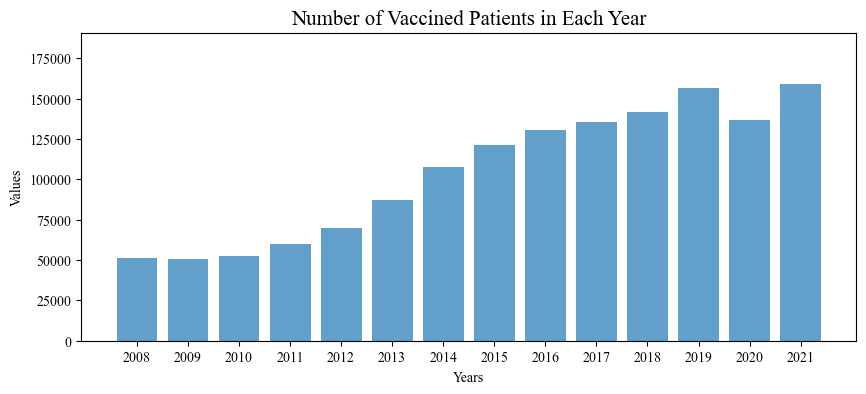

In [32]:


categories = list(grouped_tdap['vax_year'])

values = list(grouped_vax['count'])

plt.figure(figsize=(10, 4))
# Create a bar chart
plt.bar(categories, values,alpha=0.7)
# plt.plot(categories,values,color='r')

# Add labels and a title
plt.ylim(0,max(values)+max(values)/5)
plt.xlabel('Years',fontproperties = legend_font)
plt.ylabel('Values',fontproperties = legend_font)
plt.title('Number of Vaccined Patients in Each Year' , fontproperties = title_font)
plt.xticks(fontproperties = legend_font)
plt.xticks(categories,fontproperties = legend_font)
plt.yticks(fontproperties = legend_font)

# Display the chart
plt.show()

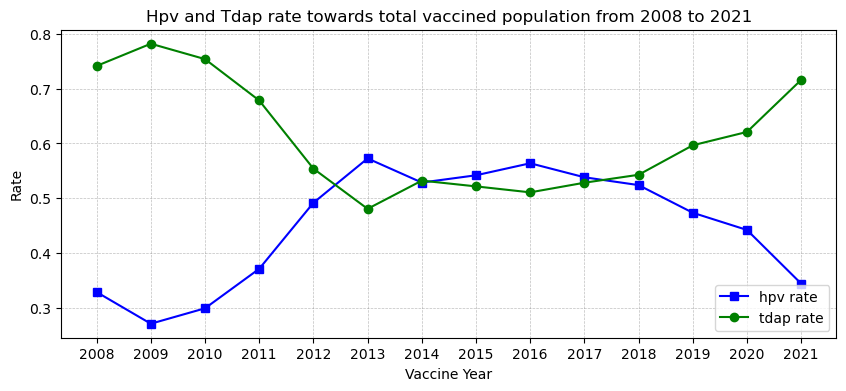

In [33]:
years = list(grouped_tdap['vax_year'])
rate_hpv = np.array(grouped_hpv['count'])/np.array(grouped_vax['count'])
rate_tdap = np.array(grouped_tdap['count'])/np.array(grouped_vax['count'])

plt.figure(figsize=(10, 4))

plt.plot(years, rate_hpv,'s-', color='blue', label='hpv rate')
plt.plot(years, rate_tdap,'o-', color='green', label='tdap rate')
# plt.plot(years, rate3,'^-', color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv and Tdap rate towards total vaccined population from 2008 to 2021')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

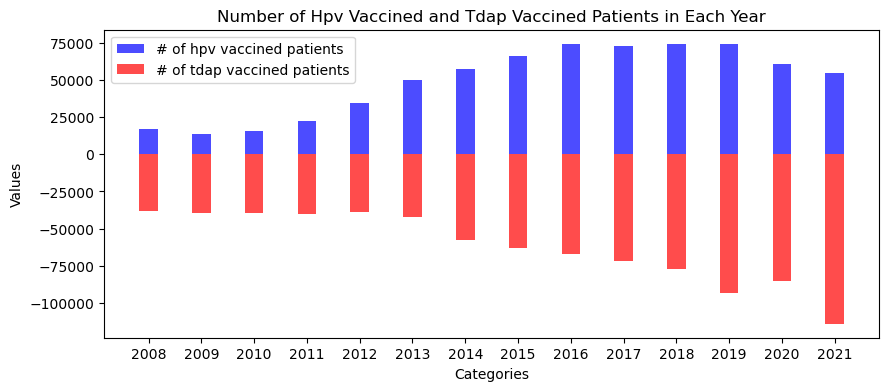

In [39]:


categories = years
values_above = list(grouped_hpv['count'])
values_below = list(grouped_tdap['count'])

bar_width = 0.35

x = np.arange(len(categories))


plt.figure(figsize=(10, 4))


plt.bar(x, values_above, width=bar_width, label='# of hpv vaccined patients', color='blue', alpha=0.7)

plt.bar(x, [-val for val in values_below], width=bar_width, label='# of tdap vaccined patients', color='red', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Number of Hpv Vaccined and Tdap Vaccined Patients in Each Year')
plt.xticks(x, categories)
plt.legend()

plt.show()


In [41]:
!pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 71.3 MB/s eta 0:00:0000:0100:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32998 sha256=0d750fed72fb2280c01e76c91e0f66bb8f934f511a904835cd49b1a7292c3f87
  Stored in directory: /Users/zihanding/Library/Caches/pip/wheels/d4/8e/97/ee3ac19fd5eff8adb2793592b9e64f078dff3e434b108f7139
Successfully built matplotlib_venn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
osmnx 1.3

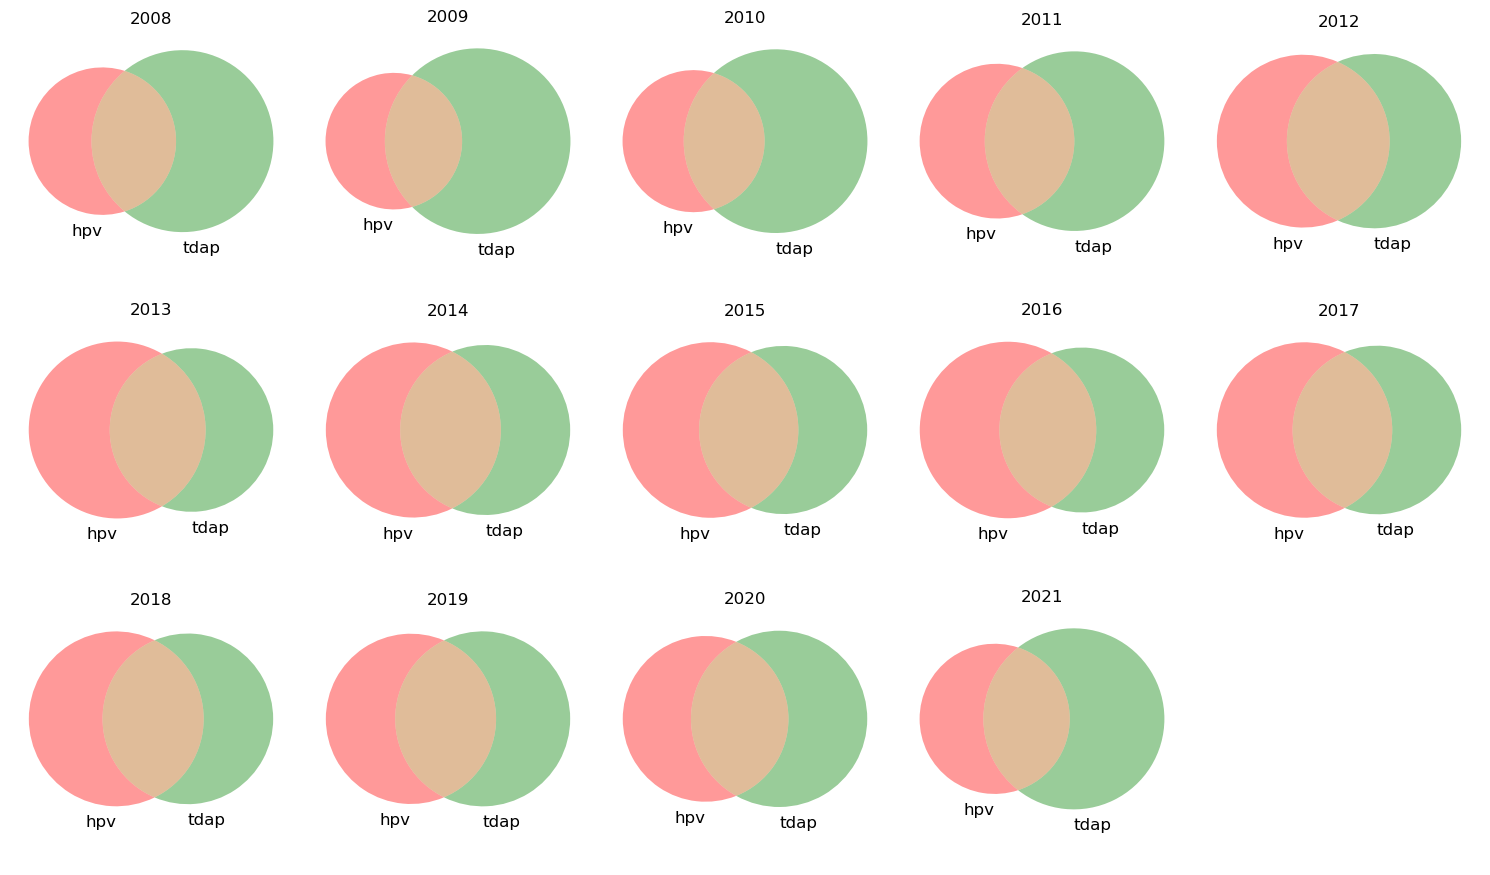

In [162]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
# from matplotlib_venn import venn
import numpy as np

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

# percentages = np.linspace(0, 1, 14)  # 生成14个不同的百分比值
percentages = rate_hpv

for i, percentage in enumerate(percentages):
    ax = axes[i]
    set1_percentage = percentage
    set2_percentage = 1 - percentage
    intersection_percentage = min(set1_percentage, set2_percentage)

    venn = venn2(subsets=(set1_percentage, set2_percentage, intersection_percentage),
          set_labels=('hpv', 'tdap'), ax=ax)

    ax.set_title(years[i])

    for text in venn.subset_labels:
        text.set_text('')
for j in range(len(percentages), len(axes)):
    axes[j].axis('off')
    

plt.tight_layout()


plt.show()


## After Nov 17 meeting

#### 1. We will focus on 11-13 year old patients.   
Almost 94% teenagers vaccined tdap during 11-13 years old  
We can treat the tdap vaccine patients as the total populations

In [60]:
print(len(df_hpv_nassau))
print(len(df_hpv_suffolk))
print(len(df_tdap_nassau))
print(len(df_tdap_suffolk))

411877
444569
417734
467401


In [65]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])
df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

In [87]:
res = df_tdap.drop_duplicates(subset=['client_id','vax_year'])

In [67]:
df_tdap

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
29,532375,11,2010,WHITE,NOT HISPANIC OR LATINO,10,Unspecified,11001.0,Nassau,Nassau,F
30,591190,2,2010,WHITE,NOT HISPANIC OR LATINO,20,Unspecified,11001.0,Nassau,Seneca,F
31,805052,4,2015,OTHER,HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,M
32,806808,8,2013,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,F
33,806823,9,2018,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Adacel,11001.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
471024,24163063,12,2010,OTHER,NOT HISPANIC OR LATINO,10,Boostrix,11703.0,Suffolk,Suffolk,M
471025,24163097,1,2014,BLACK OR AFRICAN-AMERICAN,HISPANIC OR LATINO,10,Unspecified,11787.0,Suffolk,Suffolk,M
471026,24163132,6,2008,UNKNOWN,UNKNOWN,18,Adacel,11763.0,Suffolk,Suffolk,F
471027,24163279,6,2021,WHITE,HISPANIC OR LATINO,27,Unspecified,11717.0,Suffolk,Suffolk,F


In [85]:
res['PatientAge'].unique()

array([ 10,  20,  11,  15,  16,   9,  24,  14,  17,  21,   7,  31,  19,
        12,  18,   8,  25,  27,  23,  26,  13,  22,  28,  29,  30,  44,
        52,  38,  49,  62,  68,  73,  35,  74,  61,  51,  33,  43,  67,
        57,  46,  60,  76,  63,  69,  71,  50,  47,  65,  72,  78,  92,
        75,  56,  66,  37,  39,  48,  54,  70,  79,  59,  55,  80,  97,
        41,  40,  64,  42,  36,  34,  77,  85,  45,  94,  32,  90,  89,
        83,  88,  58,  84,  93,  86,  81, 100,  53,  87,  82,  99,  96,
       102,  91,  95,  98, 103, 101, 120, 110, 119, 115, 106, 104, 107,
       105, 111, 109, 121])

In [88]:
grouped = res.groupby('PatientAge').size().reset_index(name='count')
grouped.head(15)

,PatientAge,count
0,7,11148
1,8,6601
2,9,6370
3,10,168231
4,11,270537
5,12,17446
6,13,11623
7,14,12819
8,15,15074
9,16,16561


In [62]:
dfhpv2017 = df_hpv[df_hpv['vax_year']==2017]
dfhpvAge2017 = df_hpv[]

85168

411877
444569
417734
467401


#### just test: using 2015 data

In [ ]:
df_hpv2015age = df_hpv[df_hpv['vax_year']==2015]

In [90]:
df_tdap

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
29,532375,11,2010,WHITE,NOT HISPANIC OR LATINO,10,Unspecified,11001.0,Nassau,Nassau,F
30,591190,2,2010,WHITE,NOT HISPANIC OR LATINO,20,Unspecified,11001.0,Nassau,Seneca,F
31,805052,4,2015,OTHER,HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,M
32,806808,8,2013,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11001.0,Nassau,Nassau,F
33,806823,9,2018,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Adacel,11001.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
471024,24163063,12,2010,OTHER,NOT HISPANIC OR LATINO,10,Boostrix,11703.0,Suffolk,Suffolk,M
471025,24163097,1,2014,BLACK OR AFRICAN-AMERICAN,HISPANIC OR LATINO,10,Unspecified,11787.0,Suffolk,Suffolk,M
471026,24163132,6,2008,UNKNOWN,UNKNOWN,18,Adacel,11763.0,Suffolk,Suffolk,F
471027,24163279,6,2021,WHITE,HISPANIC OR LATINO,27,Unspecified,11717.0,Suffolk,Suffolk,F


In [94]:
grouped = df_tdap.groupby(['Trade_name','PatientAge']).size().reset_index(name='count')
grouped

,Trade_name,PatientAge,count
0,Acel-Imune,7,3
1,Acel-Imune,8,2
2,Acel-Imune,10,2
3,Acel-Imune,11,6
4,Acel-Imune,12,1
...,...,...,...
910,Vaxelis,11,2
911,Vaxelis,16,1
912,Vaxelis,38,1
913,Vaxelis,67,1


In [96]:
max_index = grouped['count'].idxmax()
max_row = grouped.loc[max_index]
max_row

Trade_name    Unspecified
PatientAge             11
count              179639
Name: 803, dtype: object

### Task 1: Age 11-13 how many children complete the series(2 dose), and when the gap between 2 dose (hpv)

In [99]:
df_distinct = df_hpv.drop_duplicates(subset=['client_id'], keep='first')

In [139]:
df_distinct = df_hpv.drop_duplicates(subset=['client_id'], keep='first')
clients = np.array(df_distinct[(df_distinct['PatientAge']<=13) & (df_distinct['PatientAge']>=11)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]


In [111]:
len(df_hpv)

856446

In [115]:
len(df_distinct)

410778

In [121]:
len(clients)

195253

In [122]:
len(qual_patients_records)

396777

In [140]:
grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')
grouped

,client_id,count
0,28751,3
1,34816,3
2,35786,1
3,46635,2
4,47959,2
...,...,...
195248,23573786,1
195249,23573852,2
195250,23574745,2
195251,23577049,2


In [141]:
group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,35251
1,2,118480
2,3,41522


Text(0.5, 1.0, 'Distribution of Age 11-13 children Completeness of Hpv Vaccine')

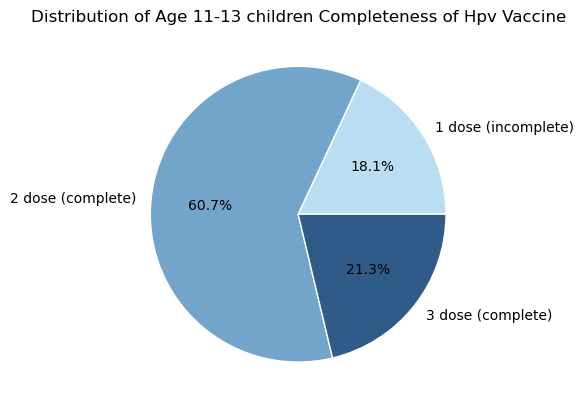

In [144]:
# 11-13 age group
labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', 
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age 11-13 children Completeness of Hpv Vaccine')
# plt.show() 


In [145]:
df_distinct = df_hpv.drop_duplicates(subset=['client_id'], keep='first')
clients = np.array(df_distinct[(df_distinct['PatientAge']<=13) & (df_distinct['PatientAge']>=10)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,38513
1,2,129895
2,3,43899


Text(0.5, 1.0, 'Distribution of Age 10-13 children Completeness of Hpv Vaccine')

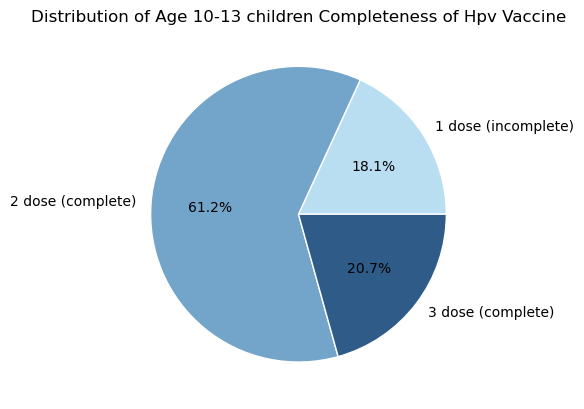

In [146]:
# 10-13 age group
labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', 
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age 10-13 children Completeness of Hpv Vaccine')
# plt.show() 


### Task 2: Overall Age complete or Not? (<15 and >=15)

In [170]:
df_distinct = df_hpv.drop_duplicates(subset=['client_id'], keep='first')
clients = np.array(df_distinct[(df_distinct['PatientAge']<=14)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,49312
1,2,163939
2,3,59301


Text(0.5, 1.0, 'Distribution of Age Under 15 children Completeness of Hpv Vaccine')

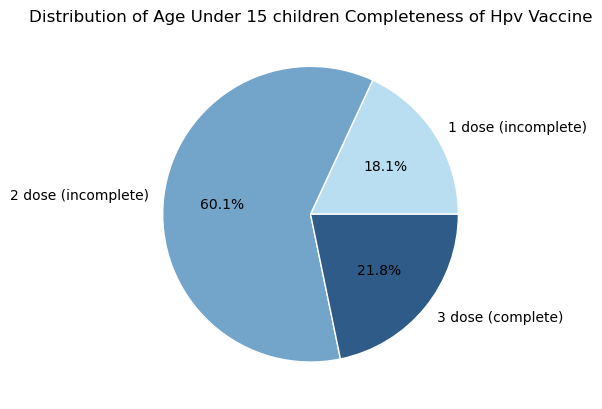

In [171]:
# 10-13 age group
labels = ["1 dose (incomplete)", "2 dose (incomplete)", "3 dose (complete)"]
value = list(group['c'])
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', 
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age Under 15 children Completeness of Hpv Vaccine')
# plt.show() 


In [165]:
df_distinct = df_hpv.drop_duplicates(subset=['client_id'], keep='first')
clients = np.array(df_distinct[(df_distinct['PatientAge']>14)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,38598
1,2,36129
2,3,63499


Text(0.5, 1.0, 'Distribution of Age Over 15 Teenagers Completeness of Hpv Vaccine')

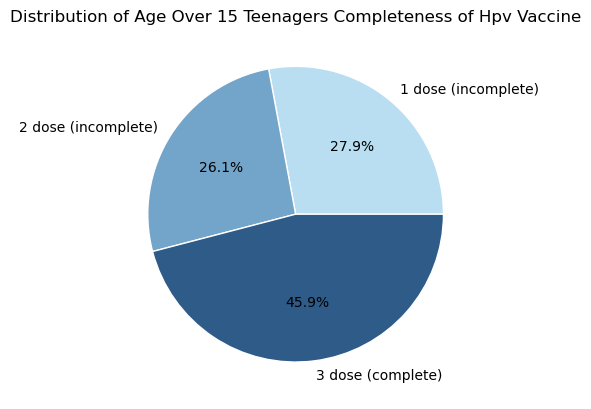

In [169]:
# 10-13 age group
labels = ["1 dose (incomplete)", "2 dose (incomplete)", "3 dose (complete)"]
value = list(group['c'])
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', 
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age Over 15 Teenagers Completeness of Hpv Vaccine')
# plt.show() 


### Task 3 time series analysis on Age 11-13 . and Age 10-13


In [172]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])
df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])
df_t = pd.concat([df_hpv,df_tdap])

In [224]:
distinct_df_total = df_t.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_total = distinct_df_total[(distinct_df_total['PatientAge']>=11) & (distinct_df_total['PatientAge']<=13)]
grouped_total = distinct_df_total.groupby('vax_year').size().reset_index(name='count')
grouped_total

,vax_year,count
0,2008,26390
1,2009,25893
2,2010,27358
3,2011,30088
4,2012,32319
5,2013,38370
6,2014,41391
7,2015,44067
8,2016,46850
9,2017,47054


In [225]:
distinct_df_hpv = df_hpv.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_hpv = distinct_df_hpv[(distinct_df_hpv['PatientAge']>=11) & (distinct_df_hpv['PatientAge']<=13)]
grouped_hpv = distinct_df_hpv.groupby('vax_year').size().reset_index(name='count')
grouped_hpv

,vax_year,count
0,2008,6514
1,2009,5064
2,2010,6204
3,2011,8492
4,2012,11915
5,2013,17394
6,2014,20917
7,2015,26569
8,2016,31593
9,2017,32731


In [226]:
distinct_df_tdap = df_tdap.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_tdap = distinct_df_tdap[(distinct_df_tdap['PatientAge']>=11) & (distinct_df_tdap['PatientAge']<=13)]
grouped_tdap = distinct_df_tdap.groupby('vax_year').size().reset_index(name='count')
grouped_tdap

,vax_year,count
0,2008,21371
1,2009,21928
2,2010,22502
3,2011,23200
4,2012,22164
5,2013,23621
6,2014,23869
7,2015,21395
8,2016,19999
9,2017,19139


In [227]:
estimate = np.array(grouped_tdap['count'])/0.94
estimate

array([22735.10638298, 23327.65957447, 23938.29787234, 24680.85106383,
       23578.72340426, 25128.72340426, 25392.55319149, 22760.63829787,
       21275.53191489, 20360.63829787, 20024.46808511, 20982.9787234 ,
       22631.91489362, 21911.70212766])

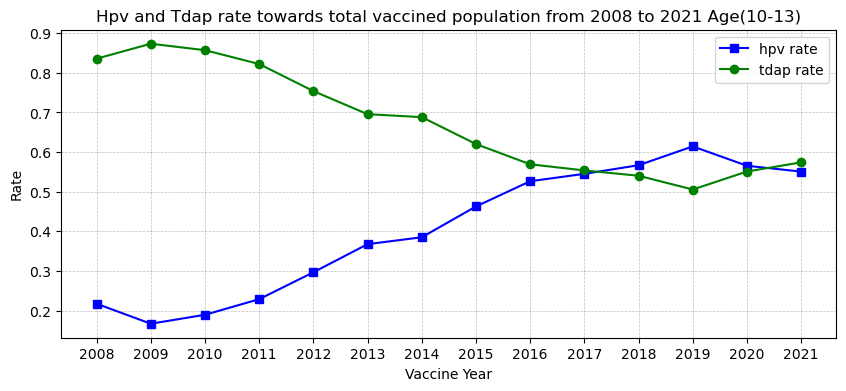

In [197]:
years = list(grouped_tdap['vax_year'])
rate_hpv = np.array(grouped_hpv['count'])/np.array(grouped_total['count'])
rate_tdap = np.array(grouped_tdap['count'])/np.array(grouped_total['count'])


plt.figure(figsize=(10, 4))

plt.plot(years, rate_hpv,'s-', color='blue', label='hpv rate')
plt.plot(years, rate_tdap,'o-', color='green', label='tdap rate')
# plt.plot(years, rate3,'^-', color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv and Tdap rate towards total vaccined population from 2008 to 2021 Age(10-13)')

plt.xticks(years)
plt.legend()

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

In [203]:
rate_hpv = np.array(grouped_hpv['count'])/estimate
# rate_tdap = np.array(grouped_tdap['count'])/np.array(grouped_total['count'])

In [208]:
rate_tdap = np.array([0.94]*len(estimate))
rate_tdap

array([0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94])

In [206]:
rate_hpv

array([0.24419261, 0.17936479, 0.20755596, 0.26142527, 0.36980833,
       0.49670236, 0.52577503, 0.70131294, 0.86947281, 0.92541466,
       0.98618482, 1.1423564 , 0.9649078 , 0.90175709])

In [207]:
rate_hpv+rate_tdap -1

array([0.18419261, 0.11936479, 0.14755596, 0.20142527, 0.30980833,
       0.43670236, 0.46577503, 0.64131294, 0.80947281, 0.86541466,
       0.92618482, 1.0823564 , 0.9049078 , 0.84175709])

0.24 0.94 0.18 2008
0.18 0.94 0.12 2009
0.21 0.94 0.15 2010
0.26 0.94 0.2 2011
0.37 0.94 0.31 2012
0.5 0.94 0.44 2013
0.53 0.94 0.47 2014
0.7 0.94 0.64 2015
0.87 0.94 0.81 2016
0.93 0.94 0.87 2017
0.99 0.94 0.93 2018
1.14 0.94 1.08 2019
0.96 0.94 0.9 2020
0.9 0.94 0.84 2021


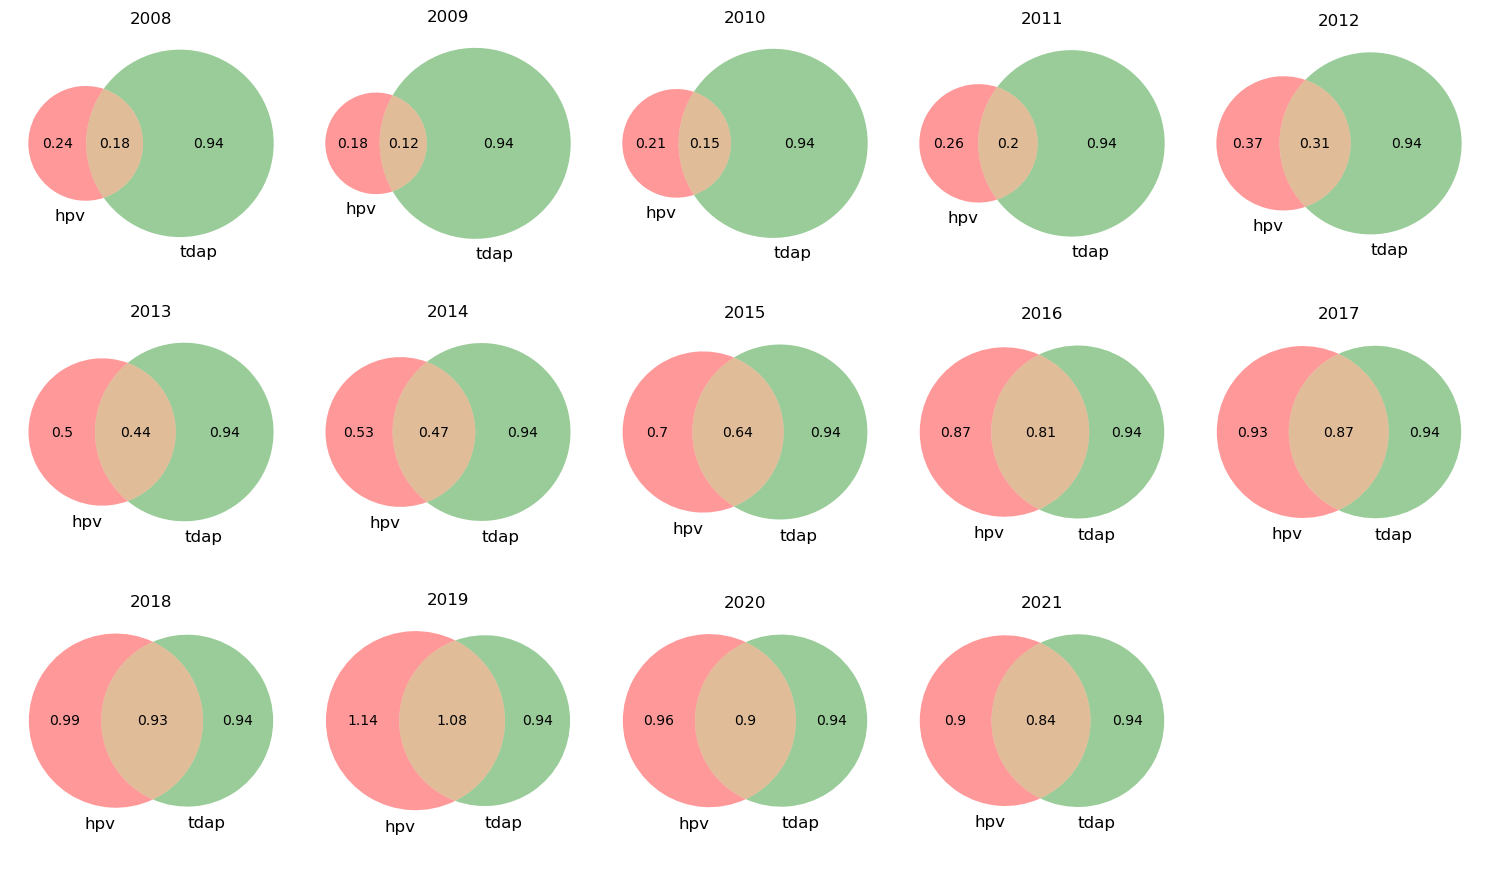

In [219]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
# from matplotlib_venn import venn
import numpy as np

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

# percentages = np.linspace(0, 1, 14)  # 生成14个不同的百分比值

for i in range(len(rate_hpv)):
    ax = axes[i]
    set1_percentage = round(rate_hpv[i],2)
    set2_percentage = round(rate_tdap[i],2)
    intersection_percentage = round(set1_percentage+set2_percentage-1.0,2)
    print(set1_percentage,set2_percentage,intersection_percentage,years[i])

    venn = venn2(subsets=(set1_percentage, set2_percentage, intersection_percentage),
          set_labels=('hpv', 'tdap'), ax=ax)

    ax.set_title(years[i])

#     for text in venn.subset_labels:
#         text.set_text()
for j in range(len(percentages), len(axes)):
    axes[j].axis('off')
    

plt.tight_layout()


plt.show()


In [235]:
rate_hpv_1013

array([0.24419261, 0.17936479, 0.20755596, 0.26142527, 0.36980833,
       0.49670236, 0.52577503, 0.70131294, 0.86947281, 0.92541466,
       0.98618482, 1.1423564 , 0.9649078 , 0.90175709])

In [234]:
rate_hpv_1113

array([0.28651724, 0.21708136, 0.2591663 , 0.34407241, 0.50532846,
       0.69219593, 0.82374544, 1.16732227, 1.48494525, 1.60756257,
       1.75345482, 1.76738491, 1.40977907, 1.33467495])

In [223]:
rate_hpv_1013 = np.array(grouped_hpv['count'])/estimate

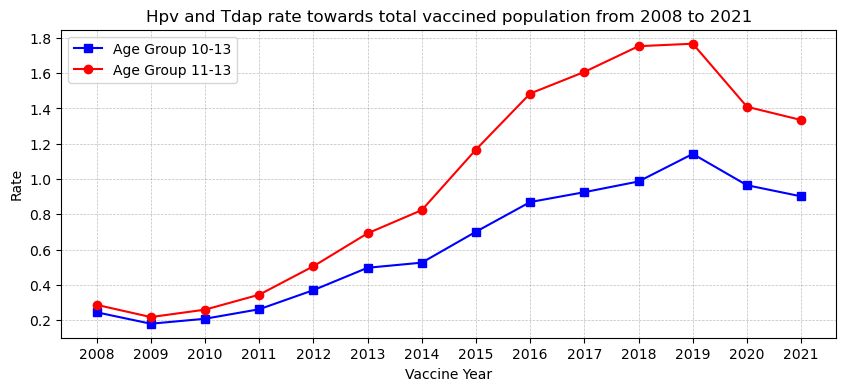

In [233]:
years = list(grouped_tdap['vax_year'])
# rate_hpv = np.array(grouped_hpv['count'])/np.array(grouped_total['count'])
# rate_tdap = np.array(grouped_tdap['count'])/np.array(grouped_total['count'])

rate_hpv_1113 = np.array(grouped_hpv['count'])/estimate

plt.figure(figsize=(10, 4))

plt.plot(years, rate_hpv_1013,'s-', color='blue', label='Age Group 10-13')
plt.plot(years, rate_hpv_1113,'o-', color='red', label='Age Group 11-13')
# plt.plot(years, rate3,'^-', color='red', label='Age 22-26')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv and Tdap rate towards total vaccined population from 2008 to 2021')

plt.xticks(years)
plt.legend()
# 
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

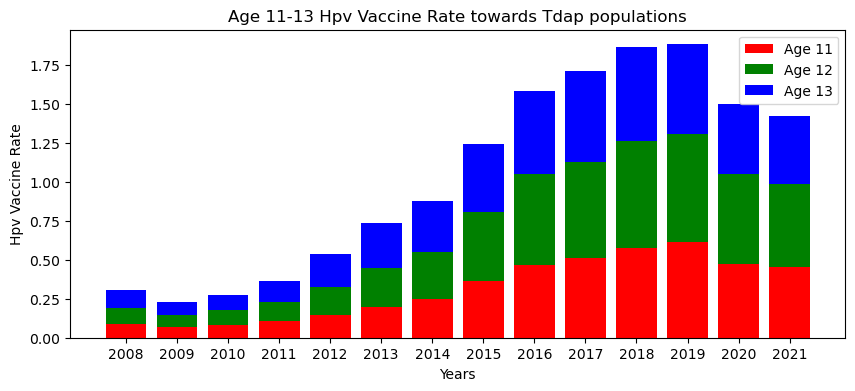

In [270]:

categories = years
values1 = np.array(grouped_hpv11['count'])/np.array(grouped_tdap['count'])
values2 = np.array(grouped_hpv12['count'])/np.array(grouped_tdap['count'])
values3 = np.array(grouped_hpv13['count'])/np.array(grouped_tdap['count'])

x = categories
plt.figure(figsize=(10, 4))

plt.bar(x, values1, label='Age 11', color='red')

plt.bar(x, values2, label='Age 12', color='green', bottom=values1)

plt.bar(x, values3, label='Age 13', color='blue', bottom=np.add(values1, values2))


plt.xlabel('Years')

plt.ylabel('Hpv Vaccine Rate')

plt.xticks(x, categories)

plt.legend()

plt.title('Age 11-13 Hpv Vaccine Rate towards Tdap populations')

plt.show()


In [237]:
distinct_df_total = df_t.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_total = distinct_df_total[(distinct_df_total['PatientAge']>=11) & (distinct_df_total['PatientAge']<=13)]
grouped_total = distinct_df_total.groupby('vax_year').size().reset_index(name='count')
grouped_total

,vax_year,count
0,2008,26390
1,2009,25893
2,2010,27358
3,2011,30088
4,2012,32319
5,2013,38370
6,2014,41391
7,2015,44067
8,2016,46850
9,2017,47054


In [250]:
distinct_df_hpv = df_hpv.drop_duplicates(subset=['client_id','vax_year'], keep='first')
# distinct_df_hpv = distinct_df_hpv[distinct_df_hpv['PatientAge']==11]
grouped_hpv10 = distinct_df_hpv[distinct_df_hpv['PatientAge']==10].groupby('vax_year').size().reset_index(name='count')
grouped_hpv11 = distinct_df_hpv[distinct_df_hpv['PatientAge']==11].groupby('vax_year').size().reset_index(name='count')
grouped_hpv12 = distinct_df_hpv[distinct_df_hpv['PatientAge']==12].groupby('vax_year').size().reset_index(name='count')
grouped_hpv13 = distinct_df_hpv[distinct_df_hpv['PatientAge']==13].groupby('vax_year').size().reset_index(name='count')


In [273]:
distinct_df_tdap = df_tdap.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_tdap = distinct_df_tdap[(distinct_df_tdap['PatientAge']>=11) & (distinct_df_tdap['PatientAge']<=13)]
grouped_tdap = distinct_df_tdap.groupby('vax_year').size().reset_index(name='count')
grouped_tdap

,vax_year,count
0,2008,21371
1,2009,21928
2,2010,22502
3,2011,23200
4,2012,22164
5,2013,23621
6,2014,23869
7,2015,21395
8,2016,19999
9,2017,19139


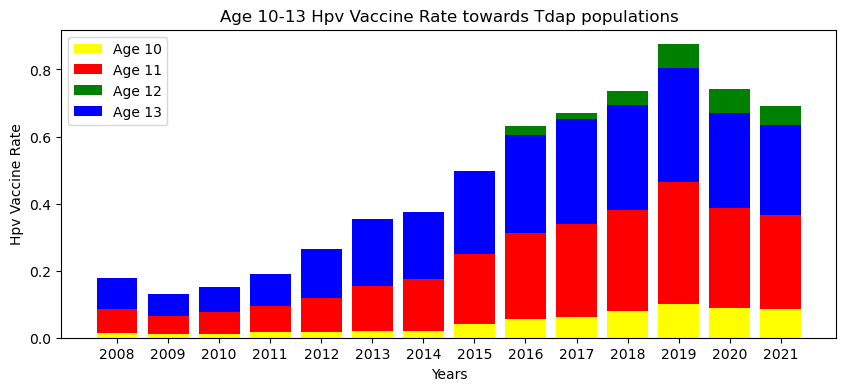

In [263]:

categories = years
values0 = np.array(grouped_hpv10['count'])/np.array(grouped_tdap['count'])
values1 = np.array(grouped_hpv11['count'])/np.array(grouped_tdap['count'])
values2 = np.array(grouped_hpv12['count'])/np.array(grouped_tdap['count'])
values3 = np.array(grouped_hpv13['count'])/np.array(grouped_tdap['count'])

x = categories
plt.figure(figsize=(10, 4))

plt.bar(x, values0, label='Age 10', color='yellow')

plt.bar(x, values1, label='Age 11', color='red',bottom=values0)

plt.bar(x, values2, label='Age 12', color='green', bottom=np.add(values0, values1))

plt.bar(x, values3, label='Age 13', color='blue', bottom=np.add(values0,values1, values2))


plt.xlabel('Years')

plt.ylabel('Hpv Vaccine Rate')

plt.xticks(x, categories)

plt.legend()

plt.title('Age 10-13 Hpv Vaccine Rate towards Tdap populations')

plt.show()

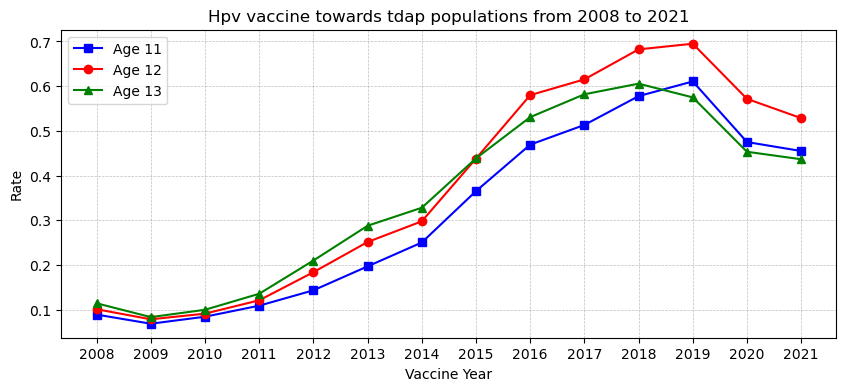

In [272]:
years = list(grouped_tdap['vax_year'])

plt.figure(figsize=(10, 4))

# plt.plot(years, values0,'*-', color='black', label='Age 10')
plt.plot(years, values1,'s-', color='blue', label='Age 11')
plt.plot(years, values2,'o-', color='red', label='Age 12')
plt.plot(years, values3,'^-', color='g', label='Age 13')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vaccine towards tdap populations from 2008 to 2021')

plt.xticks(years)
plt.legend()
# 
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

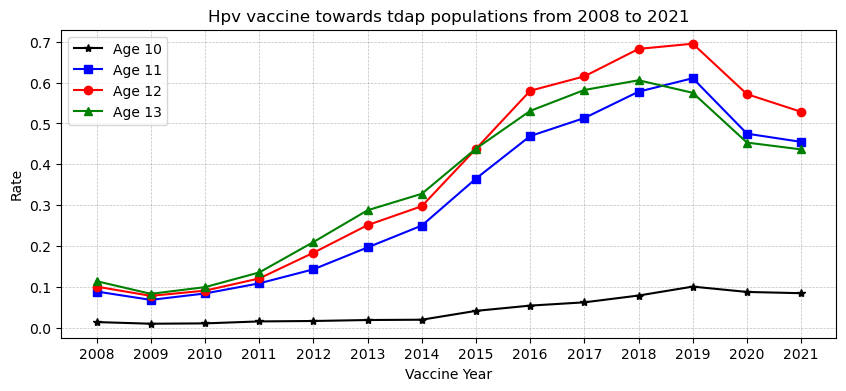

In [274]:
years = list(grouped_tdap['vax_year'])

plt.figure(figsize=(10, 4))

plt.plot(years, values0,'*-', color='black', label='Age 10')
plt.plot(years, values1,'s-', color='blue', label='Age 11')
plt.plot(years, values2,'o-', color='red', label='Age 12')
plt.plot(years, values3,'^-', color='g', label='Age 13')

plt.xlabel('Vaccine Year')
plt.ylabel('Rate')
plt.title('Hpv vaccine towards tdap populations from 2008 to 2021')

plt.xticks(years)
plt.legend()
# 
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()

#### Race difference

In [275]:
distinct_df_tdap = df_tdap.drop_duplicates(subset=['client_id','vax_year'], keep='first')
distinct_df_tdap = distinct_df_tdap[(distinct_df_tdap['PatientAge']>=11) & (distinct_df_tdap['PatientAge']<=13)]
grouped_tdap = distinct_df_tdap.groupby('vax_year').size().reset_index(name='count')
grouped_tdap

,vax_year,count
0,2008,21371
1,2009,21928
2,2010,22502
3,2011,23200
4,2012,22164
5,2013,23621
6,2014,23869
7,2015,21395
8,2016,19999
9,2017,19139
